## Import Library

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [110]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"

df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [111]:
# rename column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan","Harga Penawaran (dari Owner)": "Harga Penawaran", "Lebar Jalan Depan Rumah (ROW)": "Lebar Jalan Depan Rumah"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [112]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [80]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [113]:
# Get unique values and their counts for each column
for col in df.columns:
    print(f"Unique values in '{col}':")
    unique_values = df[col].unique()
    print(unique_values)
    print(f"Count of unique values: {len(unique_values)}")
    print("-" * 30)

Unique values in 'Area Category':
['Standard' 'Below Standard' 'Sangat Premium' 'Premium']
Count of unique values: 4
------------------------------
Unique values in 'Nama Daerah':
['Citraland' 'Setro Baru Utara' 'Kenjeran' 'Gubeng' 'Sawahan' 'Mulyorejo'
 'Tegalsari' 'Tambaksari' 'Kalilom Lor Timur' 'Jelidro Manukan' 'Kalilom'
 'Bulak Cumpat barat' 'Tambak Wedi' 'Lebak Jaya'
 'Simo Gunung Kramat Timur' 'Medokan Ayu' 'Lebak Rejo' 'Medokan Sawah'
 'Klampis Ngasem' 'Medokan Sawah Timur' 'Citraland Golf Avenue'
 'Wisata Semanggi' 'Kedung Klinter' 'Gading Indah Regency'
 'Gunung Anyar Mas' 'Kutisari Utara' 'Mulyosari Tengah' 'Kapas Madya'
 'Bratang Gede' 'Citraland Utara' 'Lebak Jaya Utara' 'Mulyosari Timur'
 'Pakuwon City' 'Pakuwon city' 'Pakuwon City Florence' 'Pantai Mentari'
 'Royal Residence' 'Villa Kalijudan Indah' 'Sutorejo Timur'
 'Springville Residence' 'Sukomanunggal' 'Surabaya Pusat' 'Su' 'Mulyosari'
 'Krukah Selatan' 'Mulyosari Utara' 'Pondok Benowo Indah' 'Kenjeran Indah'
 'Teng

In [114]:
# drop nama daerah because to many unique value for categorical
df = df.drop('Nama Daerah', axis=1)

/tmp/ipython-input-3486337634.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




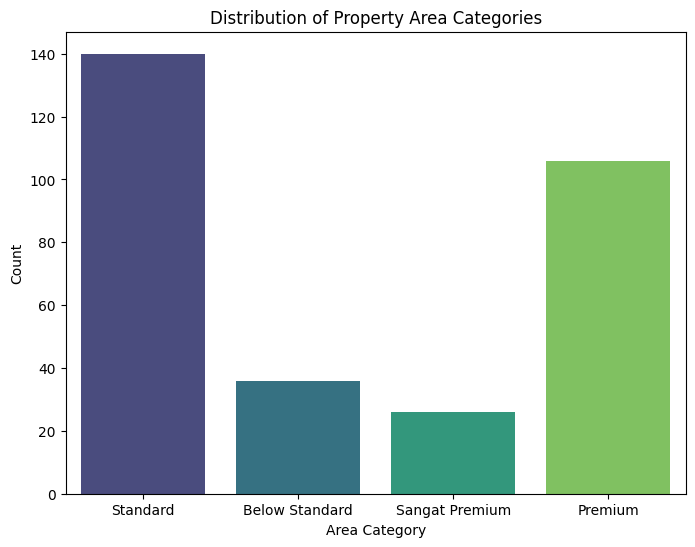

In [115]:
# Create a bar chart of 'Area Category'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Area Category', palette='viridis')
plt.title('Distribution of Property Area Categories')
plt.xlabel('Area Category')
plt.ylabel('Count')
plt.show()

#Sebagian besar properti berada di kategori area 3 dan 1, yang bisa menjadi fokus utama untuk strategi penjualan atau analisis pasar karena mewakili segmen terbesar.

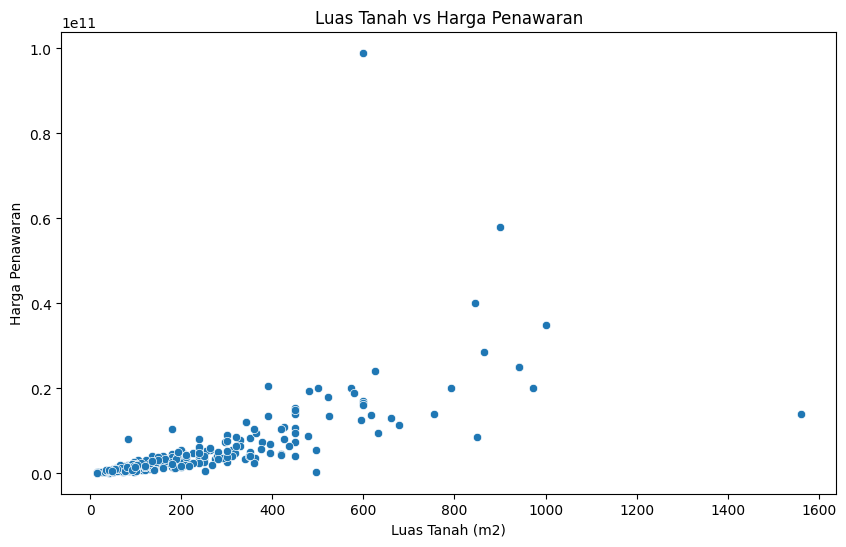

In [116]:
# Create a scatter plot of 'Luas Tanah' vs 'Harga Penawaran'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Luas Tanah', y='Harga Penawaran')
plt.title('Luas Tanah vs Harga Penawaran')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran')
plt.show()

# luas tanah memengaruhi harga penawaran, tetapi ada faktor lain (seperti lokasi, bangunan, atau fasilitas) yang juga berperan menentukan nilai properti.

## Data Transformation

In [83]:
# Encoding other categorical columns
le = LabelEncoder()
df['Area Category'] = le.fit_transform(df['Area Category'])
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah'] = le.fit_transform(df['Lebar Jalan Depan Rumah'])

df.head()

,Area Category,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,240,300,4,3,2,3500000000,0,Utara,2,0
1,0,30,60,2,1,2,287799000,0,Utara,2,1
2,3,170,170,5,4,2,2699999999,0,Selatan,0,0
3,2,187,250,5,5,2,3100000000,0,Utara,2,0
4,1,350,600,5,5,2,5000000000,0,Barat,2,0


In [84]:
# Encoding four categorical columns
le_area = LabelEncoder()
df['Area Category'] = le_area.fit_transform(df['Area Category'])

le_terjual = LabelEncoder()
df['Terjual/Belum'] = le_terjual.fit_transform(df['Terjual/Belum'])

le_lebar = LabelEncoder()
df['Arah Hadap Rumah'] = le_lebar.fit_transform(df['Arah Hadap Rumah'])

le_posisi = LabelEncoder()
df['Posisi Rumah'] = le_posisi.fit_transform(df['Posisi Rumah'])

le_lebar = LabelEncoder()
df['Lebar Jalan Depan Rumah'] = le_lebar.fit_transform(df['Lebar Jalan Depan Rumah'])

df.head()

,Area Category,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,240,300,4,3,2,3500000000,0,3,2,0
1,0,30,60,2,1,2,287799000,0,3,2,1
2,3,170,170,5,4,2,2699999999,0,1,0,0
3,2,187,250,5,5,2,3100000000,0,3,2,0
4,1,350,600,5,5,2,5000000000,0,0,2,0


In [85]:
# Create a StandardScaler object
sc = StandardScaler()

# Select the numerical columns to scale
numerical_cols = ['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran']

# Fit and transform the selected numerical columns
df_scaled_numerical = sc.fit_transform(df[numerical_cols])

# Create a new DataFrame with the scaled numerical data
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols)

# Display the first few rows of the scaled numerical DataFrame
display(df_scaled_numerical.head())

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [86]:
# Select the encoded categorical columns from the original dataframe
categorical_cols_encoded = ['Area Category', 'Terjual/Belum', 'Posisi Rumah', 'Lebar Jalan Depan Rumah', 'Arah Hadap Rumah'] # Include 'Arah Hadap Rumah'

# Create a new DataFrame with the encoded categorical data
df_encoded_categorical = df[categorical_cols_encoded].copy()

# Concatenate the scaled numerical dataframe and the encoded categorical dataframe
df_for_clustering = pd.concat([df_scaled_numerical, df_encoded_categorical], axis=1)

# Display the first few rows of the combined dataframe
display(df_for_clustering.head())

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Area Category,Terjual/Belum,Posisi Rumah,Lebar Jalan Depan Rumah,Arah Hadap Rumah
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,3,0,2,0,3
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0,0,2,1,3
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,3,0,0,0,1
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,2,0,2,0,3
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,1,0,2,0,0


In [87]:
# get stastical information on the new dataset
df_scaled_numerical.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

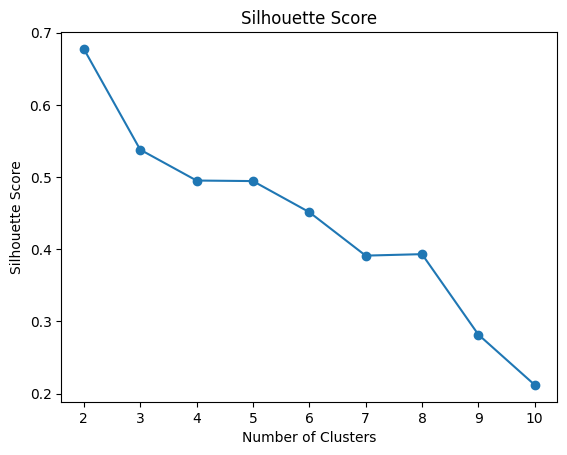

In [88]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_for_clustering)
    silhouette_avg = silhouette_score(df_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


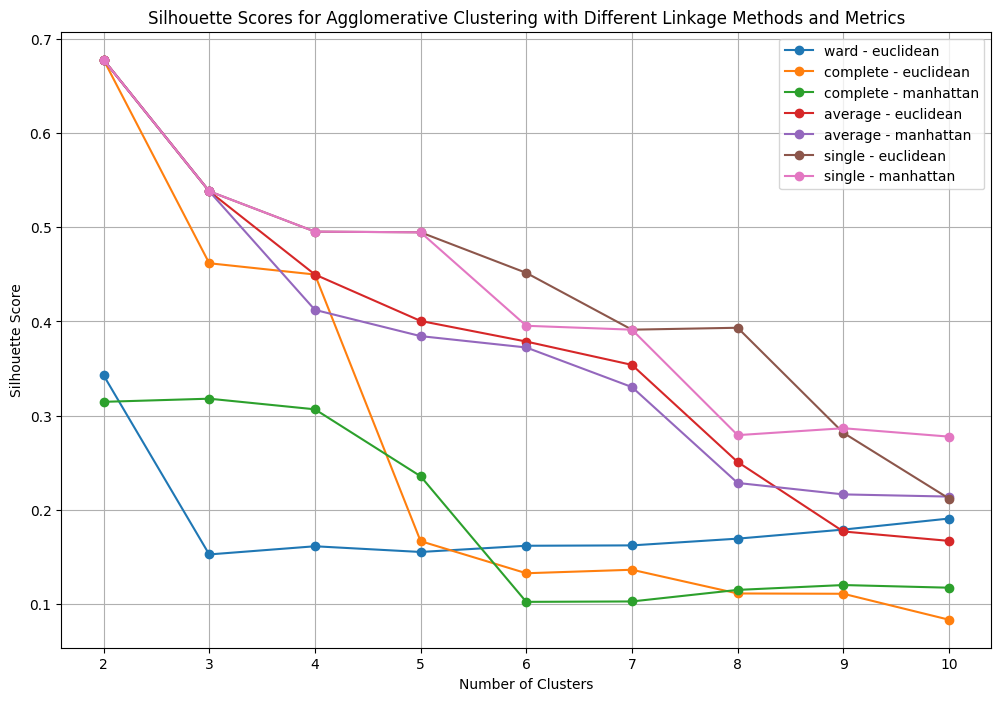

Best Silhouette Score: 0.6776204891746238
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [89]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_for_clustering)
            silhouette_avg = silhouette_score(df_for_clustering, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

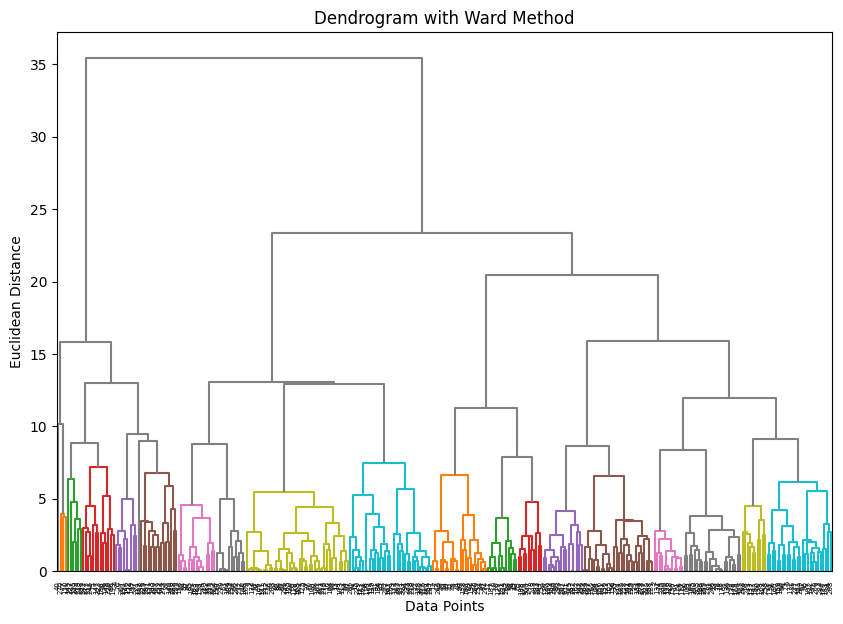

In [90]:
# Ward Method
linked = linkage(df_for_clustering, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

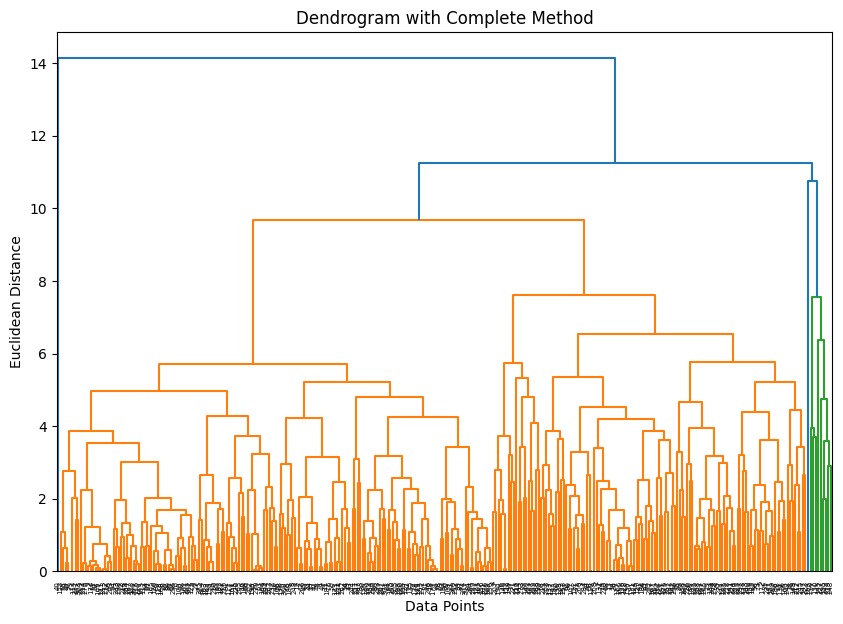

In [91]:
# Max Distance
linked = linkage(df_for_clustering, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [92]:
# Hierarchical Clustering
# Complete euclidean
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_for_clustering)

# Ward euclidean
agglo_ward = AgglomerativeClustering(n_clusters=2, linkage="ward", metric="euclidean")
y_hc_ward = agglo_ward.fit_predict(df_for_clustering)

In [93]:
# Evaluation
# Complete Euclidean
ss = silhouette_score(df_for_clustering, y_hc)
print(ss)

# Ward Euclidean
ss = silhouette_score(df_for_clustering, y_hc_ward)
print(ss)

0.6776204891746238
0.34288114831643945


## Dendogram Visualization for Hierarchical Clustering Model

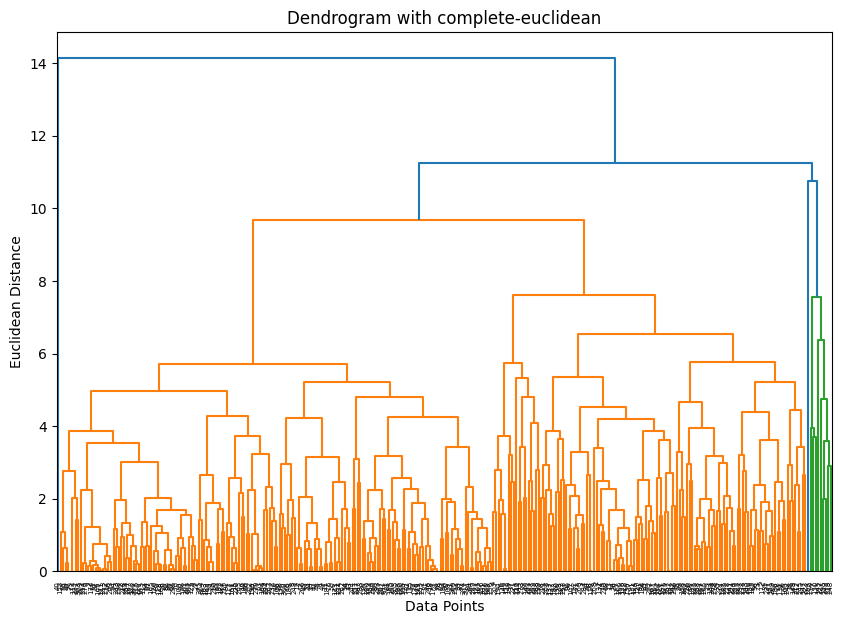

In [94]:
# Average Distance
# Complete Euclidean
linked = linkage(df_for_clustering, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

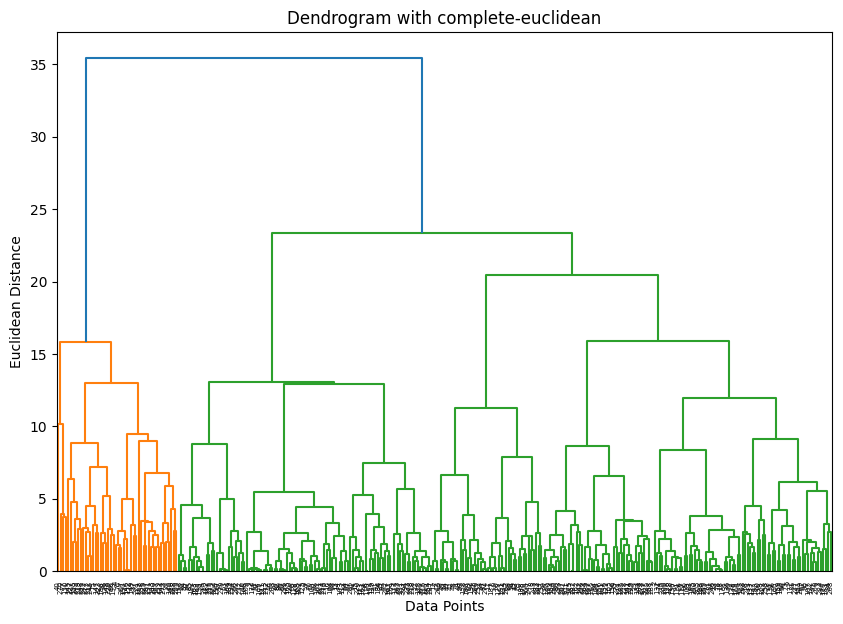

In [95]:
# Average Distance
# Ward Euclidean
linked = linkage(df_for_clustering, method="ward", metric="euclidean")

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [96]:
# Add the cluster labels to the original data
df['Agglo_Complete'] = y_hc
# Analyze the clusters with the original values
df.head()

,Area Category,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo_Complete
0,3,240,300,4,3,2,3500000000,0,3,2,0,0
1,0,30,60,2,1,2,287799000,0,3,2,1,0
2,3,170,170,5,4,2,2699999999,0,1,0,0,0
3,2,187,250,5,5,2,3100000000,0,3,2,0,0
4,1,350,600,5,5,2,5000000000,0,0,2,0,0


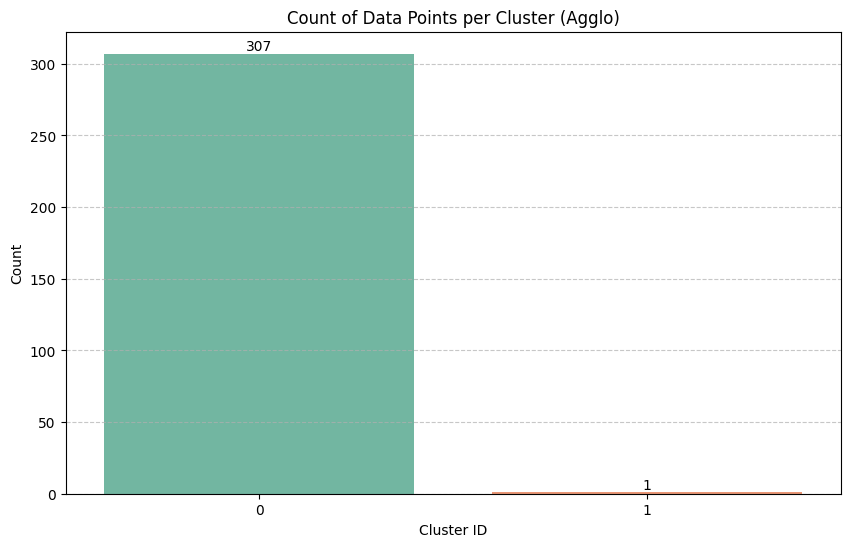

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Complete'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [99]:
# Add the cluster labels to the original data
df['Agglo_Ward'] = y_hc_ward
# Analyze the clusters with the original values
df.head()

,Area Category,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo_Complete,Agglo_Ward
0,3,240,300,4,3,2,3500000000,0,3,2,0,0,0
1,0,30,60,2,1,2,287799000,0,3,2,1,0,0
2,3,170,170,5,4,2,2699999999,0,1,0,0,0,0
3,2,187,250,5,5,2,3100000000,0,3,2,0,0,0
4,1,350,600,5,5,2,5000000000,0,0,2,0,0,1


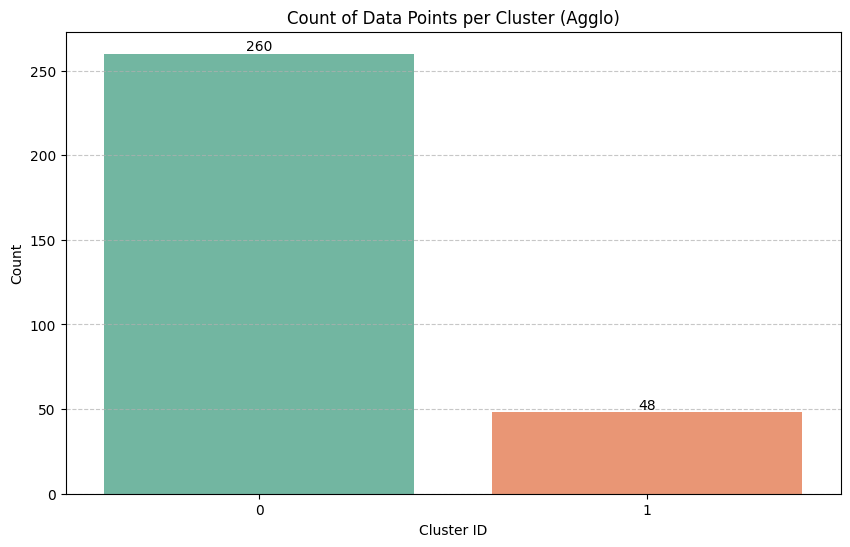

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo_Ward'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

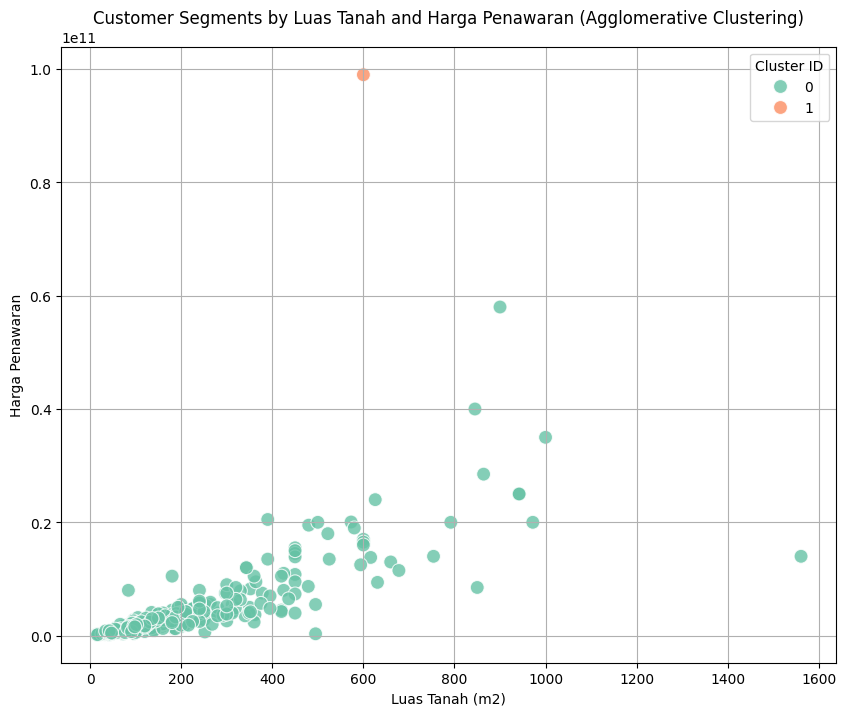

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah', y='Harga Penawaran', hue='Agglo_Complete', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Luas Tanah and Harga Penawaran (Agglomerative Clustering)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

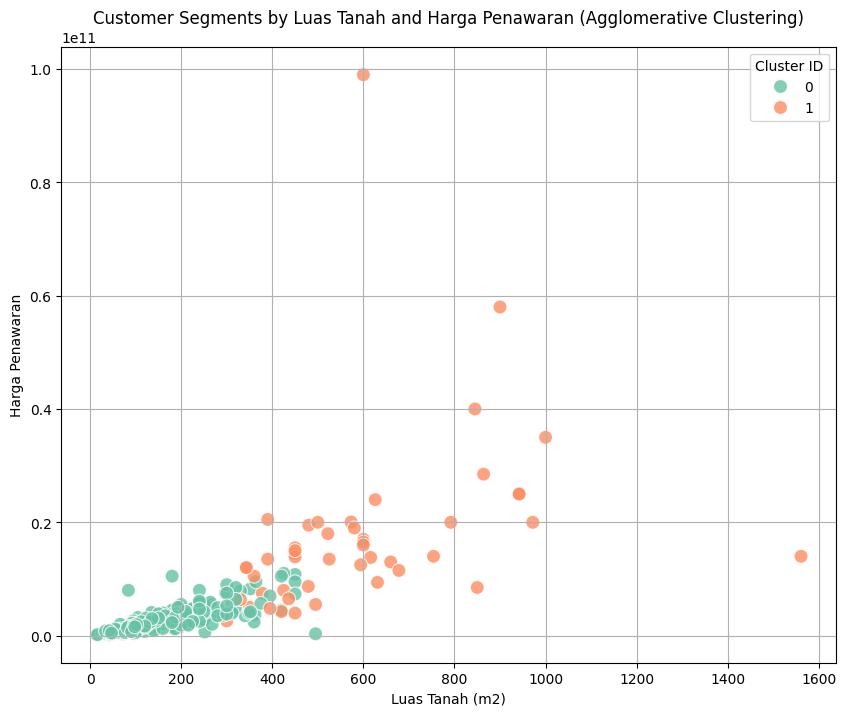

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah', y='Harga Penawaran', hue='Agglo_Ward', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Luas Tanah and Harga Penawaran (Agglomerative Clustering)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [103]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah'
y_col = 'Luas Bangunan'
z_col = 'Harga Penawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo_Complete'].astype(str), # Color points by Agglo_Complete cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo_Complete Clusters')

fig.show()

In [104]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah'
y_col = 'Luas Bangunan'
z_col = 'Harga Penawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo_Ward'].astype(str), # Color points by Agglo_Ward cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo_Ward Clusters')

fig.show()

## Statistical Summary for each cluster

In [107]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False) # Prevent wrapping to the next line
# Group the data by cluster (Agglo_Complete) and calculate relevant statistics
cluster_summary_complete = df.groupby('Agglo_Complete').agg(
    {
        'Area Category': ['first', 'count'],
        'Luas Tanah': ['mean', 'std', 'min', 'max'],
        'Luas Bangunan': ['mean', 'std', 'min', 'max'],
        'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
        'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
        'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
        'Harga Penawaran': ['mean', 'std', 'min', 'max'],
        'Terjual/Belum': ['first', 'count'], # Use first for categorical
        'Arah Hadap Rumah': ['first', 'count'], # Use first for categorical
        'Posisi Rumah': ['first', 'count'], # Use first for categorical
        'Lebar Jalan Depan Rumah': ['first', 'count'] # Use first for categorical
    }
)

# Rename the first column to mode for categorical columns
cluster_summary_complete.rename(columns={'first': 'mode'}, level=1, inplace=True)
cluster_summary_complete.rename_axis('cluster', inplace=True)


# Group the data by cluster (Agglo_Ward) and calculate relevant statistics
cluster_summary_ward = df.groupby('Agglo_Ward').agg(
    {
        'Area Category': ['first', 'count'],
        'Luas Tanah': ['mean', 'std', 'min', 'max'],
        'Luas Bangunan': ['mean', 'std', 'min', 'max'],
        'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
        'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
        'Tingkat/Lantai ': ['mean', 'std', 'min', 'max'],
        'Harga Penawaran': ['mean', 'std', 'min', 'max'],
        'Terjual/Belum': ['first', 'count'], # Use first for categorical
        'Arah Hadap Rumah': ['first', 'count'], # Use first for categorical
        'Posisi Rumah': ['first', 'count'], # Use first for categorical
        'Lebar Jalan Depan Rumah': ['first', 'count'] # Use first for categorical
    }
)

# Rename the first column to mode for categorical columns
cluster_summary_ward.rename(columns={'first': 'mode'}, level=1, inplace=True)
cluster_summary_ward.rename_axis('cluster', inplace=True)

print("Cluster Summary (Agglo_Complete):")
display(cluster_summary_complete)

print("\nCluster Summary (Agglo_Ward):")
display(cluster_summary_ward)

# Optionally, reset pandas display options after displaying
# pd.reset_option('display.max_columns')
# pd.reset_option('display.expand_frame_repr')

Cluster Summary (Agglo_Complete):


Area Category        Luas Tanah                        Luas Bangunan                        Jumlah Kamar                   Jumlah Kamar Mandi                  Tingkat/Lantai                    Harga Penawaran                                         Terjual/Belum       Arah Hadap Rumah       Posisi Rumah       Lebar Jalan Depan Rumah      
                 mode count        mean         std  min   max          mean         std  min   max         mean       std min max               mean      std min max            mean       std min max            mean           std          min          max          mode count             mode count         mode count                    mode count
cluster                                                                                                                                                                                                                                                                                                                                                     
0                   3   307  225.736156  201.019246   14  1561    265.602606  212.655015   14  1200     4.267101  1.639083   1  13           3.332248  1.62709   1  13        1.843648  0.506478   1   4    4.708159e+09  6.351742e+09    160000000  58000000000             0   307                3   307            2   307                       0   307
1                   3     1  600.000000         NaN  600   600    600.000000         NaN  600   600     7.000000       NaN   7   7           5.000000      NaN   5   5        1.000000       NaN   1   1    9.900000e+10           NaN  99000000000  99000000000             0     1                0     1            2     1                       0     1


Cluster Summary (Agglo_Ward):


Area Category        Luas Tanah                        Luas Bangunan                        Jumlah Kamar                   Jumlah Kamar Mandi                   Tingkat/Lantai                    Harga Penawaran                                        Terjual/Belum       Arah Hadap Rumah       Posisi Rumah       Lebar Jalan Depan Rumah      
                 mode count        mean         std  min   max          mean         std  min   max         mean       std min max               mean       std min max            mean       std min max            mean           std         min          max          mode count             mode count         mode count                    mode count
cluster                                                                                                                                                                                                                                                                                                                                                     
0                   3   260  160.653846   95.886936   14   495    198.707692  120.647766   14   600     3.907692  1.358208   1   9           3.015385  1.355581   1   7        1.830769  0.467284   1   3    2.770499e+09  2.139816e+09   160000000  11000000000             0   260                3   260            2   260                       0   260
1                   1    48  586.062500  243.662428  240  1561    634.916667  229.221052  250  1200     6.270833  1.633943   3  13           5.083333  1.866084   2  13        1.895833  0.691578   1   4    1.716823e+10  1.572514e+10  2600000000  99000000000             0    48                0    48            2    48                       0    48

#Berdasarkan hasil hierarchical clustering (Agglomerative Ward), terdapat 2 segmen utama pasar properti dengan karakteristik berbeda:

Cluster 0 – Properti Menengah

Luas tanah dan bangunan: relatif sedang (tanah ~160 m², bangunan ~199 m²)

Jumlah kamar: 3–4 kamar tidur, 3 kamar mandi

Harga rata-rata: sekitar Rp 2,77 miliar

Tingkat: umumnya 1–2 lantai

Arah hadap dan posisi rumah: bervariasi, namun cenderung hadap timur/barat (kode 3), posisi tengah (kode 2)

Status penjualan: sebagian besar belum terjual

Cluster 1 – Properti Premium

Luas tanah dan bangunan: sangat besar (tanah ~586 m², bangunan ~635 m²)

Jumlah kamar: 6–7 kamar tidur, 5 kamar mandi

Harga rata-rata: sekitar Rp 17 miliar

Tingkat: 2 lantai

Arah hadap: umumnya sama (kode 0–2), posisi juga seragam

Status penjualan: juga sebagian besar belum terjual, tetapi kemungkinan karena harga tinggi.

Potential Business Implications

#Pricing Strategy

Segmen menengah (Cluster 0) memiliki kisaran harga lebih mudah dijangkau dan kemungkinan lebih banyak pembeli potensial.
Disarankan fokus pada strategi promosi harga kompetitif dan pembiayaan fleksibel (KPR ringan).

Segmen premium (Cluster 1) perlu pendekatan nilai tambah seperti desain eksklusif, keamanan tinggi, atau fasilitas mewah untuk menjustifikasi harga tinggi.

#Area Targeting

Cluster 0 cocok untuk pengembangan di kawasan sub-urban atau keluarga muda dengan kebutuhan rumah fungsional dan harga sedang.

Cluster 1 cocok untuk kawasan premium atau bisnis, dengan target pasar investor dan kalangan atas.

#Marketing Focus

Untuk Cluster 0 → gunakan iklan digital dan promo harga di platform properti populer.

Untuk Cluster 1 → gunakan pendekatan personal (private viewing, event eksklusif, brand prestige).

#Product Development

Cluster 0: optimalkan layout efisien, kualitas bahan baik namun terjangkau.

Cluster 1: fokus pada arsitektur unik, fasilitas lengkap, dan keamanan tinggi.